In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [3]:
np.random.seed(37)

In [4]:
base = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.base", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [5]:
test = pd.read_csv(r"C:\Users\tancr\Downloads\ml-100k\ml-100k\ua.test", sep='\t', names = ["user_id", "movie_id", "ratings", "timestamp"])

In [6]:
matrix_base = base.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_base

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrix_test = test.pivot(values='ratings', index='user_id', columns='movie_id')
matrix_test

movie_id,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1600,1612,1617,1646,1653,1656,1662,1664
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matrix_test = matrix_test.drop([1582, 1653], axis = 1)

In [9]:
m_base = np.array(matrix_base)
m_test = np.array(matrix_test)

In [10]:
m_base = np.nan_to_num(m_base, nan = -1)
m_test = np.nan_to_num(m_test, nan = -1)


m_base = m_base.astype(int)
m_test = m_test.astype(int)

In [150]:
num_users = m_base.shape[0]
num_items = m_base.shape[1]
num_ratings = 5
num_classes = 6

In [151]:
P_z = np.random.dirichlet(np.ones(num_classes), size=1)[0]
P_x_given_z = np.random.dirichlet(np.ones(num_items), size=num_classes)
P_y_given_z = np.random.dirichlet(np.ones(num_users), size=num_classes)
P_r_given_z_x = np.random.dirichlet(np.ones(num_ratings), size=(num_classes, num_items))


In [129]:
m_base.shape

(943, 1680)

In [137]:
def e_step(user_item_matrix, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x):
    num_users, num_items = user_item_matrix.shape
    num_classes = P_z.shape[0]

    P_z_given_x_y_r = np.zeros((num_users, num_items, num_classes))
    for i in range(num_users):
        for j in range(num_items):
            r = user_item_matrix[i, j]
            if r != -1:  # only consider non-zero ratings
                for z in range(num_classes):
                    
                    P_z_given_x_y_r[i, j, z] = (P_z[z] * 
                                                P_x_given_z[z, j] * 
                                                P_y_given_z[z, i] * 
                                                P_r_given_z_x[z, j, r-1])                    
                P_z_given_x_y_r[i, j, :] /= np.sum(P_z_given_x_y_r[i, j, :])                    
    return P_z_given_x_y_r

In [133]:
r = e_step(m_base, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x)

Eccomi
0.0007211480758894167 0.00020703194565326152 9.439388623508766e-06 0.5713620795279065
Eccomi
0.9552079983680596 0.000974116234252795 0.0004824425344022584 0.00891276588615629
Eccomi
0.04407085355605095 0.001322124686589799 0.00063121544421896 0.5718198730135589
[3.21667486e-05 1.59829482e-01 8.40138351e-01]


In [43]:
def m_step(user_item_matrix, P_z_given_x_y_r, num_users, num_items, num_ratings, num_classes):
    N_z = np.sum(P_z_given_x_y_r, axis=(0, 1))
    
    P_z = N_z / np.sum(N_z)
    
    P_x_given_z = np.zeros((num_classes, num_items))
    P_y_given_z = np.zeros((num_classes, num_users))
    P_r_given_z_x = np.zeros((num_classes, num_items, num_ratings))
    
    for z in range(num_classes):
        for x in range(num_items):
            P_x_given_z[z, x] = np.sum(P_z_given_x_y_r[:, x, z]) / N_z[z]
        
        for y in range(num_users):
            P_y_given_z[z, y] = np.sum(P_z_given_x_y_r[y, :, z]) / N_z[z]
            
        for x in range(num_items):
            for r in range(num_ratings):
                mask = (user_item_matrix[:, x] == (r + 1))
                P_r_given_z_x[z, x, r] = np.sum(P_z_given_x_y_r[mask, x, z]) / np.sum(P_z_given_x_y_r[:, x, z])
    
    return P_z, P_x_given_z, P_y_given_z, P_r_given_z_x

In [138]:
def m_step(user_item_matrix, P_z_given_x_y_r, num_users, num_items, num_ratings, num_classes):
    N_z = np.sum(P_z_given_x_y_r, axis=(0, 1))
    
    P_z = N_z / np.sum(N_z)
    
    P_x_given_z = np.zeros((num_classes, num_items))
    P_y_given_z = np.zeros((num_classes, num_users))
    P_r_given_z_x = np.zeros((num_classes, num_items, num_ratings))
    
    for z in range(num_classes):
        for x in range(num_items):
            P_x_given_z[z, x] = np.sum(P_z_given_x_y_r[:, x, z]) / (np.sum(N_z) * P_z[z])
        
        for y in range(num_users):
            P_y_given_z[z, y] = np.sum(P_z_given_x_y_r[y, :, z]) / (np.sum(N_z) * P_z[z])
            
        for x in range(num_items):
            for r in range(num_ratings):
                if np.sum(P_z_given_x_y_r[:, x, z]) == 0:
                    continue
                mask = (user_item_matrix[:, x] == (r + 1))
                P_r_given_z_x[z, x, r] = np.sum(P_z_given_x_y_r[mask, x, z]) / np.sum(P_z_given_x_y_r[:, x, z])
                
    return P_z, P_x_given_z, P_y_given_z, P_r_given_z_x

In [72]:
def compute_log_likelihood(user_item_matrix, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x):
    num_users, num_items = user_item_matrix.shape
    num_classes = P_z.shape[0]
    log_likelihood = 0.0

    for i in range(num_users):
        for j in range(num_items):
            r = user_item_matrix[i, j]
            if r > 0:  # only consider non-zero ratings
                prob = 0.0
                for z in range(num_classes):
                    prob += (P_z[z] * 
                             P_x_given_z[z, j] * 
                             P_y_given_z[z, i] * 
                             P_r_given_z_x[z, j, r-1])
                log_likelihood += np.log(prob)
    return log_likelihood

In [45]:
a, b, c, d = m_step(m_base, r, num_users, num_items, num_ratings, num_classes)

In [73]:
compute_log_likelihood(m_base, a, b, c, d)

-1309706.9634567513

In [90]:
def fit(user_item_matrix, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x, num_users, num_items, num_ratings, num_classes, max_iter=100):

    log_likelihoods = []

    for i in range(max_iter):
        posterior = e_step(user_item_matrix, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x)
        P_z, P_x_given_z, P_y_given_z, P_r_given_z_x = m_step(user_item_matrix, posterior, num_users, num_items, num_ratings, num_classes)
        log_likelihood = compute_log_likelihood(user_item_matrix, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x)
        log_likelihoods.append(log_likelihood)
        print(f'{i=}', f'{log_likelihood=}')

    return P_z, P_x_given_z, P_y_given_z, P_r_given_z_x, log_likelihoods, posterior

In [152]:
p1, p2, p3, p4, l, pos = fit(m_base, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x, num_users, num_items, num_ratings, num_classes, max_iter=100)

i=0 log_likelihood=-1309019.5928392934
i=1 log_likelihood=-1306305.5899026054
i=2 log_likelihood=-1304564.883121602
i=3 log_likelihood=-1302981.0822104984
i=4 log_likelihood=-1301297.3990086452
i=5 log_likelihood=-1299404.7814445398
i=6 log_likelihood=-1297278.0726127485
i=7 log_likelihood=-1294968.8061304393
i=8 log_likelihood=-1292574.0048868675
i=9 log_likelihood=-1290217.281835551
i=10 log_likelihood=-1288007.5702180008
i=11 log_likelihood=-1285992.8342315475
i=12 log_likelihood=-1284172.5889103443
i=13 log_likelihood=-1282538.8735591397
i=14 log_likelihood=-1281085.592561944
i=15 log_likelihood=-1279786.9607901522
i=16 log_likelihood=-1278628.6738922987
i=17 log_likelihood=-1277612.769238351
i=18 log_likelihood=-1276719.8013281922
i=19 log_likelihood=-1275938.3291396017
i=20 log_likelihood=-1275248.2503952258
i=21 log_likelihood=-1274632.465872832
i=22 log_likelihood=-1274087.2647961844
i=23 log_likelihood=-1273615.5775660565
i=24 log_likelihood=-1273203.5428673418
i=25 log_likeli

Text(0, 0.5, 'Observed Log Likelihood')

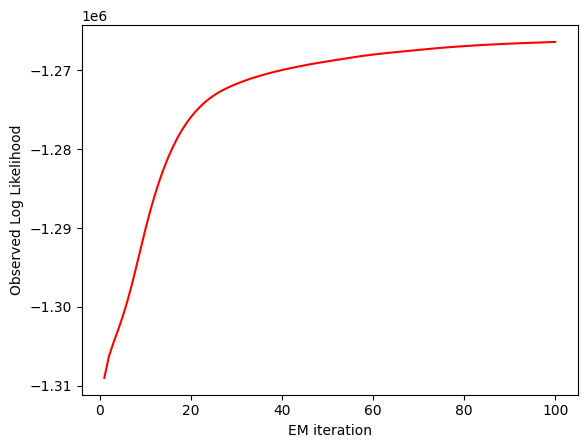

In [160]:
plt.plot(np.arange(1,101), l, 'r-')
plt.xlabel("EM iteration")
plt.ylabel("Observed Log Likelihood")

In [162]:
def predict(user, item, P_z, P_x_given_z, P_y_given_z, P_r_given_z_x, num_classes, num_ratings):
    rating_prob = np.zeros(num_ratings)
    for r in range(num_ratings):
        for z in range(num_classes):
            rating_prob[r] += (P_z[z] * 
                               P_x_given_z[z, item] * 
                               P_y_given_z[z, user] * 
                               P_r_given_z_x[z, item, r])
    
    expected_rating = 0
    denominator = np.sum(rating_prob)
    
    for r in range(num_ratings):
        expected_rating += (r + 1) * (rating_prob[r] / denominator)
    
    return expected_rating

In [163]:
predict(0,0,p1, p2, p3, p4,6,5)

3.749687446166015

In [158]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[c] = i
  c += 1

dic_items_test = dic

In [159]:
dic = {}
c = 0
for i in matrix_test.columns:
  dic[i] = c
  c += 1

dic_items_base = dic

In [164]:
predictions = []


for i in range(num_users):
    
    for j in range(m_test.shape[1]):

        if m_test[i,j] != -1:
            
            item_trans = dic_items_test[j]
            index_item = dic_items_base[item_trans]

            print(i,index_item)

            pred = predict(i, index_item, p1, p2, p3, p4, 6, 5)

            predictions.append(pred)

0 18
0 31
0 54
0 106
0 143
0 147
0 158
0 176
0 189
0 251
1 12
1 43
1 237
1 266
1 267
1 276
1 278
1 283
1 298
1 300
2 232
2 280
2 308
2 313
2 316
2 317
2 319
2 320
2 322
2 328
3 43
3 246
3 250
3 274
3 280
3 289
3 339
3 341
3 342
3 346
4 0
4 1
4 16
4 88
4 99
4 212
4 348
4 400
4 413
4 424
5 13
5 21
5 62
5 76
5 88
5 244
5 287
5 433
5 462
5 486
6 30
6 150
6 365
6 406
6 425
6 449
6 462
6 467
6 600
6 612
7 20
7 43
7 70
7 79
7 169
7 280
7 323
7 367
7 427
7 515
8 5
8 272
8 284
8 325
8 449
8 457
8 476
8 490
8 496
8 638
9 6
9 15
9 90
9 162
9 271
9 431
9 456
9 458
9 473
9 566
10 33
10 99
10 100
10 214
10 401
10 521
10 666
10 668
10 674
10 681
11 73
11 86
11 87
11 121
11 132
11 159
11 191
11 286
11 441
11 676
12 49
12 88
12 173
12 185
12 202
12 258
12 329
12 345
12 495
12 753
13 20
13 88
13 100
13 161
13 200
13 255
13 342
13 444
13 499
13 653
14 23
14 116
14 209
14 316
14 382
14 443
14 625
14 632
14 690
14 828
15 7
15 48
15 57
15 79
15 165
15 181
15 184
15 196
15 650
15 838
16 0
16 8
16 12
16 106
1

In [166]:
len(predictions)

9428

In [167]:
predictions = np.array(predictions)

In [168]:
real = m_test[m_test != -1]

In [170]:
np.mean(np.abs(predictions - real))

1.1041989755264134